In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/gdrive
/content/gdrive/My Drive


In [184]:
normed_product_data = pd.read_csv("output.csv")
company_id = pd.read_csv("Mobile Device Data for Assignment 2 - Company ID.csv")
model_company = pd.read_csv("Mobile Device Data for Assignment 2 - Model Company.csv")

#K-means of normed_product_data

In [ ]:
normed_product_data

Model  ... Pixel Density (per inch)
0                     Psion Organiser II LZ 64  ...                 0.000000
1             Hewlett-Packard 95LX (HP Jaguar)  ...                 0.030793
2                               Psion Series 3  ...                 0.035336
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...                 0.030793
4                              Psion Series 3a  ...                 0.129985
...                                        ...  ...                      ...
3157                      Xiaomi Mi-Two / MI-2  ...                 0.751641
3158                 Xiaomi Mi-Two / MI-2 32GB  ...                 0.751641
3159                        ZTE N9120 Avid 4G   ...                 0.480061
3160                                ZTE U930HD  ...                 0.713781
3161                                  ZTE V887  ...                 0.358910

[3162 rows x 16 columns]

In [ ]:
cleaned_data = normed_product_data.drop(['Model', 'Release Date','Release Year' , 'Model ID'], axis=1)

In [ ]:
cleaned_data

RAM Capacity (Mb)  Storage (Mb)  ...  Mass (grams)  Pixel Density (per inch)
0              0.000000      0.000000  ...      0.044181                  0.000000
1              0.000214      0.000015  ...      0.053879                  0.030793
2              0.000092      0.000015  ...      0.044181                  0.035336
3              0.000458      0.000015  ...      0.053879                  0.030793
4              0.000214      0.000015  ...      0.046336                  0.129985
...                 ...           ...  ...           ...                       ...
3157           1.000000      0.249999  ...      0.018319                  0.751641
3158           1.000000      0.499999  ...      0.018319                  0.751641
3159           0.249977      0.062080  ...      0.019397                  0.480061
3160           0.499985      0.062080  ...      0.011422                  0.713781
3161           0.249977      0.062080  ...      0.017241                  0.358910

[3162 rows x 12 columns]

In [ ]:
cleaned_data.T

0         1     ...      3160      3161
RAM Capacity (Mb)         0.000000  0.000214  ...  0.499985  0.249977
Storage (Mb)              0.000000  0.000015  ...  0.062080  0.062080
CPU Clock (MHz)           0.000000  0.002230  ...  0.599818  0.499772
Display Diagonal (in)     0.050360  0.223022  ...  0.201439  0.237410
Display Width(px)         0.000000  0.056911  ...  0.252033  0.154472
Display Length(px)        0.000000  0.047619  ...  0.619048  0.380952
Width (mm)                0.369714  0.416098  ...  0.162347  0.195089
Length (mm)               0.118852  0.147541  ...  0.344262  0.405738
Depth (mm)                0.146889  0.127646  ...  0.015394  0.026940
Volume (cubic cm)         0.059332  0.065799  ...  0.006531  0.016016
Mass (grams)              0.044181  0.053879  ...  0.011422  0.017241
Pixel Density (per inch)  0.000000  0.030793  ...  0.713781  0.358910

[12 rows x 3162 columns]

In [ ]:
features = ['RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density']
input_data = np.array(cleaned_data.T)
input_data.shape

(12, 3162)

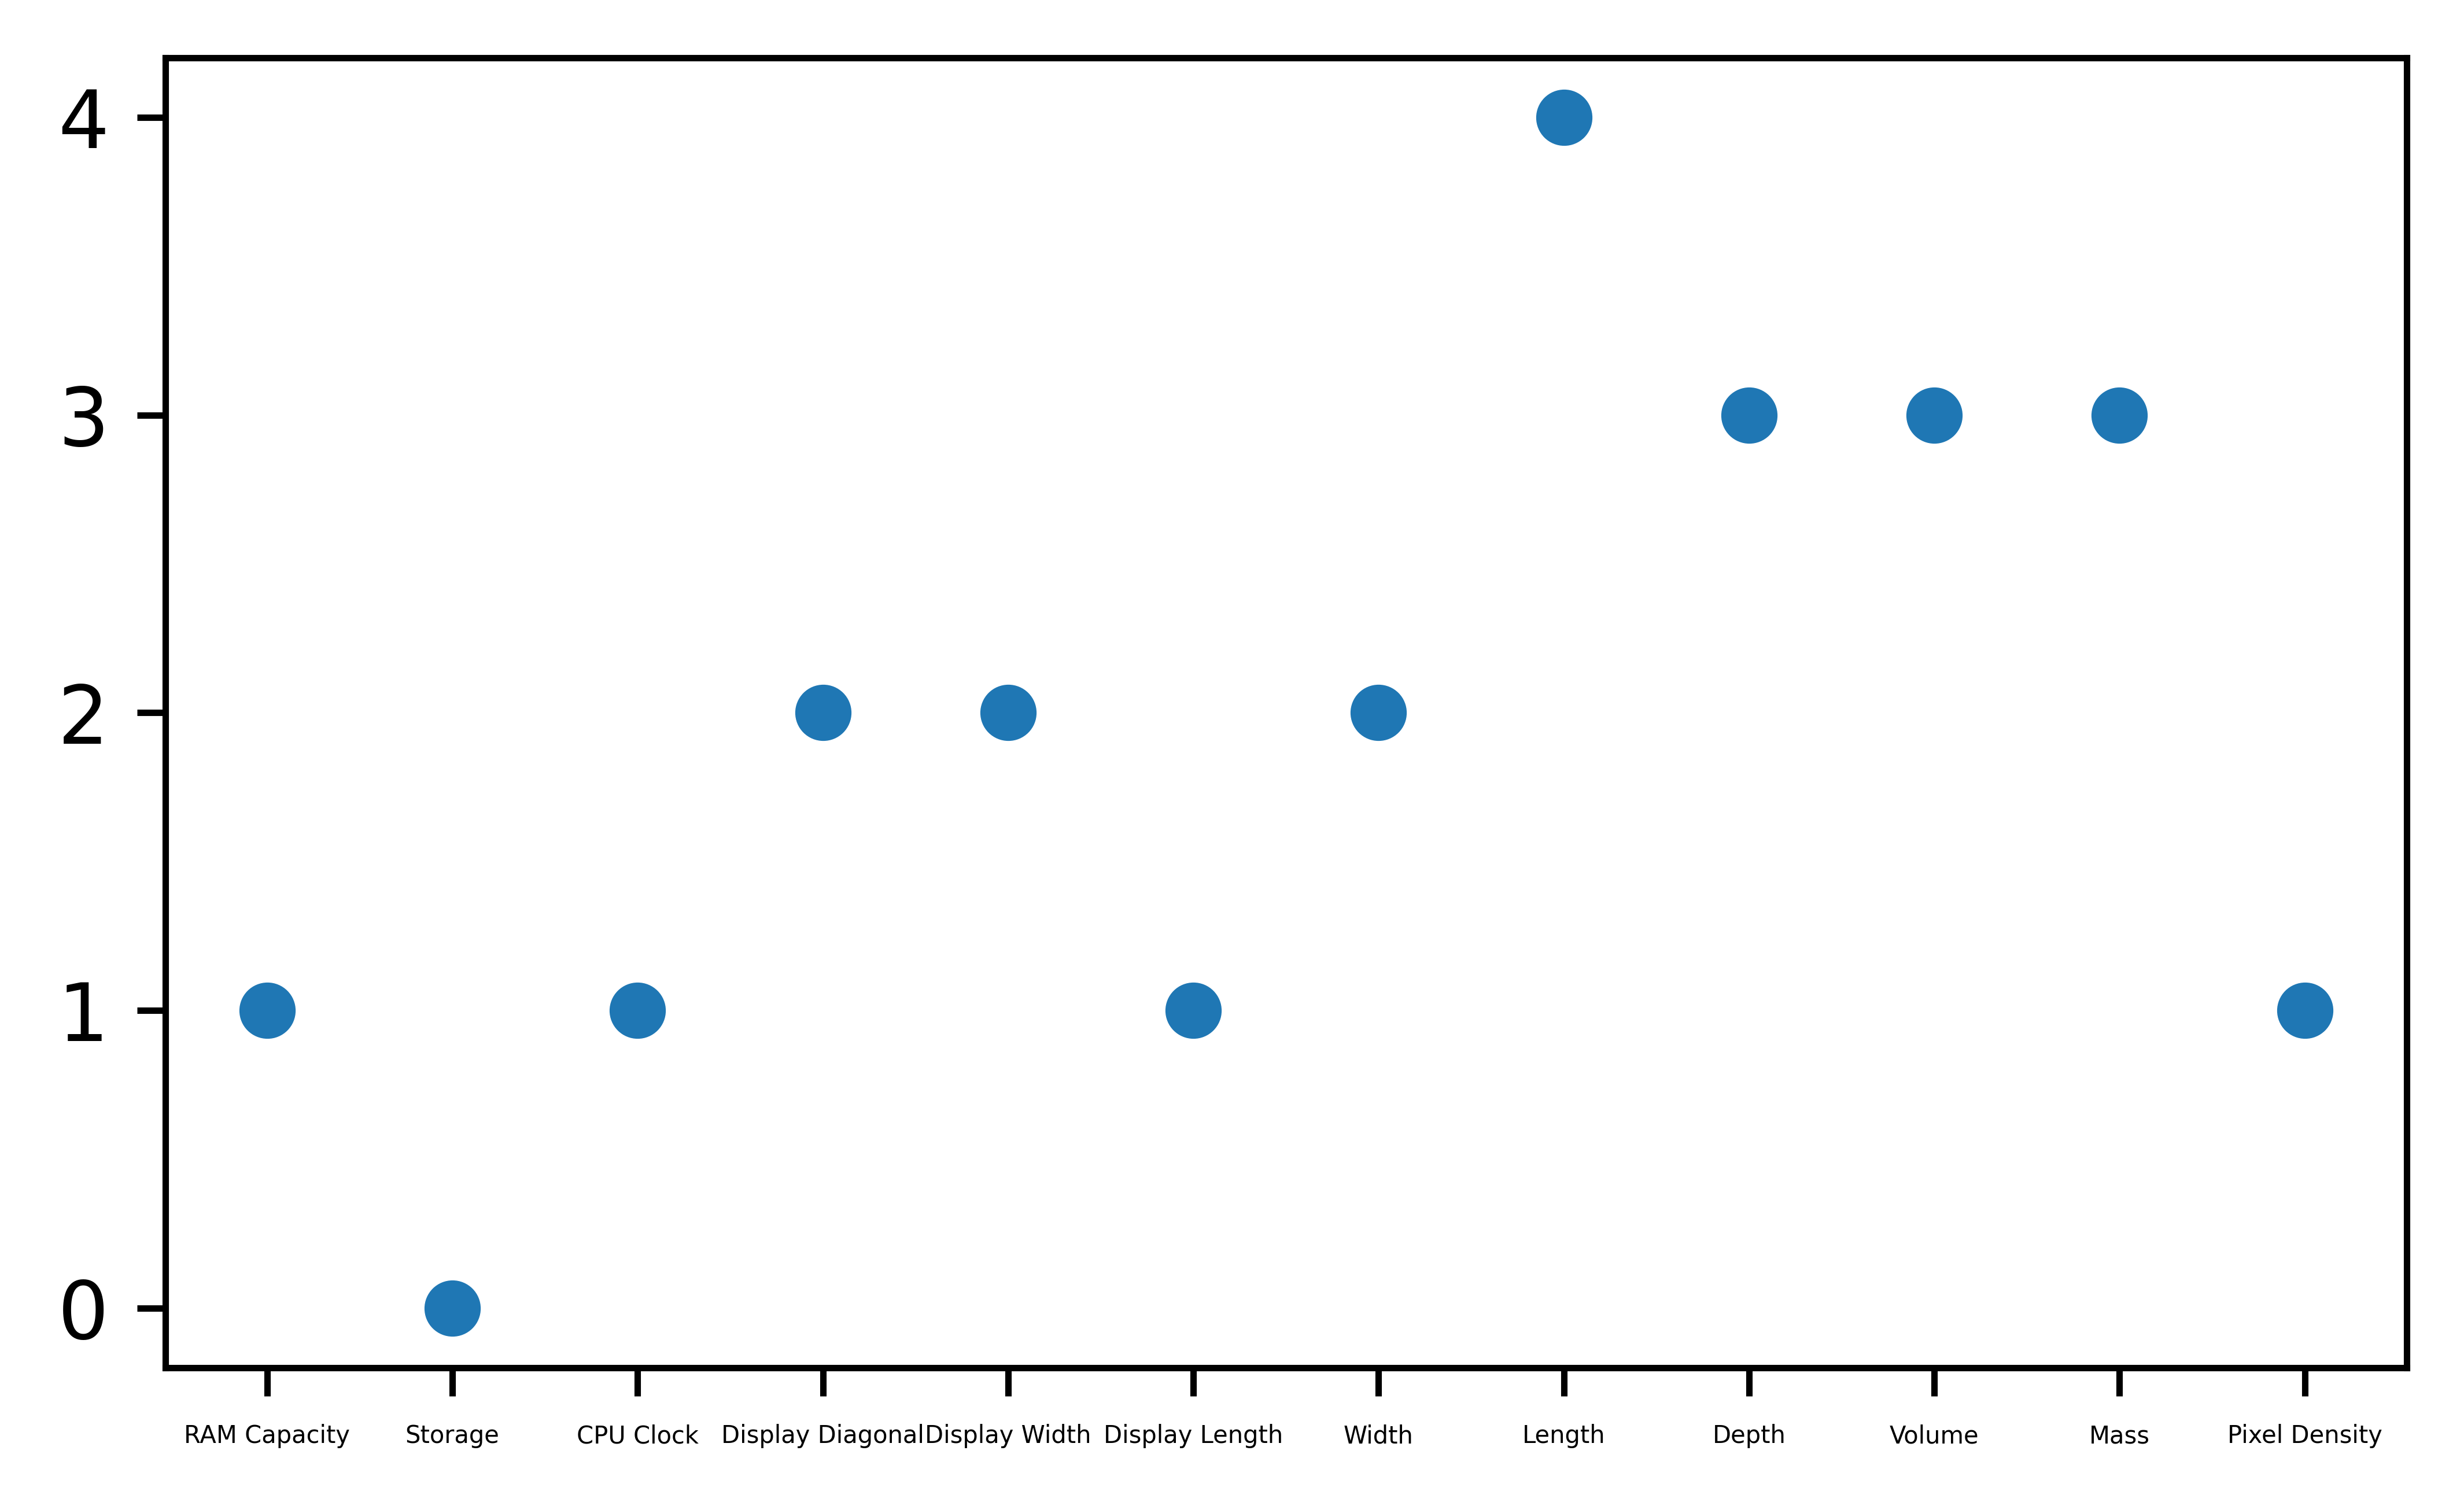

In [ ]:
kmeans = KMeans(5, random_state=0)
kmeans.fit(input_data)   # 训练模型
labels = kmeans.predict(input_data) 
plt.figure(figsize=(5,3))
plt.scatter(features, labels)
plt.xticks(fontsize=3)
plt.show()

In [ ]:
cleaned_data.T

0         1     ...      3160      3161
RAM Capacity (Mb)         0.000000  0.000214  ...  0.499985  0.249977
Storage (Mb)              0.000000  0.000015  ...  0.062080  0.062080
CPU Clock (MHz)           0.000000  0.002230  ...  0.599818  0.499772
Display Diagonal (in)     0.050360  0.223022  ...  0.201439  0.237410
Display Width(px)         0.000000  0.056911  ...  0.252033  0.154472
Display Length(px)        0.000000  0.047619  ...  0.619048  0.380952
Width (mm)                0.369714  0.416098  ...  0.162347  0.195089
Length (mm)               0.118852  0.147541  ...  0.344262  0.405738
Depth (mm)                0.146889  0.127646  ...  0.015394  0.026940
Volume (cubic cm)         0.059332  0.065799  ...  0.006531  0.016016
Mass (grams)              0.044181  0.053879  ...  0.011422  0.017241
Pixel Density (per inch)  0.000000  0.030793  ...  0.713781  0.358910

[12 rows x 3162 columns]

In [ ]:
features = ['RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density']
input_data = np.array(cleaned_data.T)
input_data.shape
pca_data = input_data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(input_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.59441643 0.17280873]
[48.27950322 14.03581628]


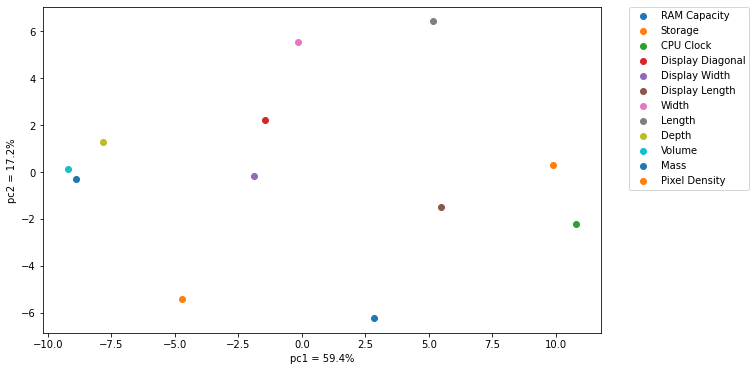

In [ ]:
X_new = pca.transform(input_data)
# plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.figure(figsize=(10,6))
for i in X_new:
  plt.scatter(i[0], i[1],marker='o')
plt.xlabel('pc1 = 59.4%')
plt.ylabel('pc2 = 17.2%')
plt.legend(('RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density'), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

In [ ]:
X_new

array([[ 2.83473943, -6.23213446],
       [-4.71318437, -5.44026937],
       [10.77262018, -2.22348663],
       [-1.46176001,  2.22004429],
       [-1.87011175, -0.18550282],
       [ 5.46267036, -1.47791867],
       [-0.15834976,  5.55066312],
       [ 5.1812798 ,  6.42473577],
       [-7.84269795,  1.26084598],
       [-9.18889858,  0.12121747],
       [-8.88904325, -0.30500402],
       [ 9.87273591,  0.28680934]])

In [ ]:
rescaled_X_new = np.zeros(X_new.shape)
for i in np.arange(X_new.shape[0]):
  rescaled_X_new[i][0] = X_new[i][0] / (0.594/0.172)
  rescaled_X_new[i][1] = X_new[i][1]

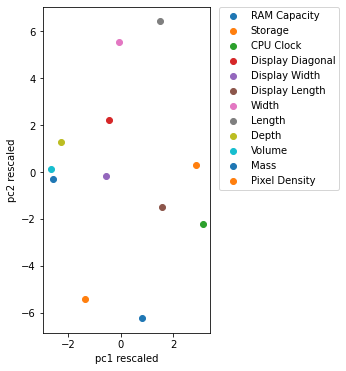

In [ ]:
plt.figure(figsize=(3,6))
for i in rescaled_X_new:
  plt.scatter(i[0], i[1],marker='o')
plt.xlabel('pc1 rescaled')
plt.ylabel('pc2 rescaled')
plt.legend(('RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density'), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

In [ ]:
rescaled_X_new_1 = np.zeros(X_new.shape)
for i in np.arange(X_new.shape[0]):
  rescaled_X_new_1[i][0] = X_new[i][0] * 0.594
  rescaled_X_new_1[i][1] = X_new[i][1] * 0.172

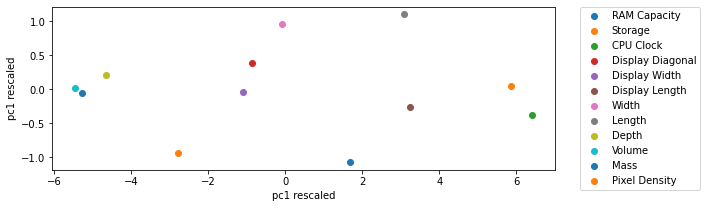

In [ ]:
plt.figure(figsize=(9,3))
for i in rescaled_X_new_1:
  plt.scatter(i[0], i[1],marker='o')
plt.xlabel('pc1 rescaled')
plt.ylabel('pc1 rescaled')
plt.legend(('RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Display Width', 'Display Length', 'Width', 'Length', 'Depth', 'Volume', 'Mass', 'Pixel Density'), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

##Drop 'Model', 'Release Date','Release Year' , 'Model ID', 'Display Width(px)', 'Display Length(px)', 'Width (mm)', 'Length (mm)', 'Depth (mm)'

In [ ]:
drop_redundant_data = normed_product_data.drop(['Model', 'Release Date','Release Year' , 'Model ID', 'Display Width(px)', 'Display Length(px)', 'Width (mm)', 'Length (mm)', 'Depth (mm)'], axis=1)
drop_redundant_features = ['RAM Capacity', 'Storage', 'CPU Clock', 'Display Diagonal', 'Volume', 'Mass', 'Pixel Density']
drop_redundant_input = np.array(drop_redundant_data.T)
drop_redundant_input.shape

(7, 3162)

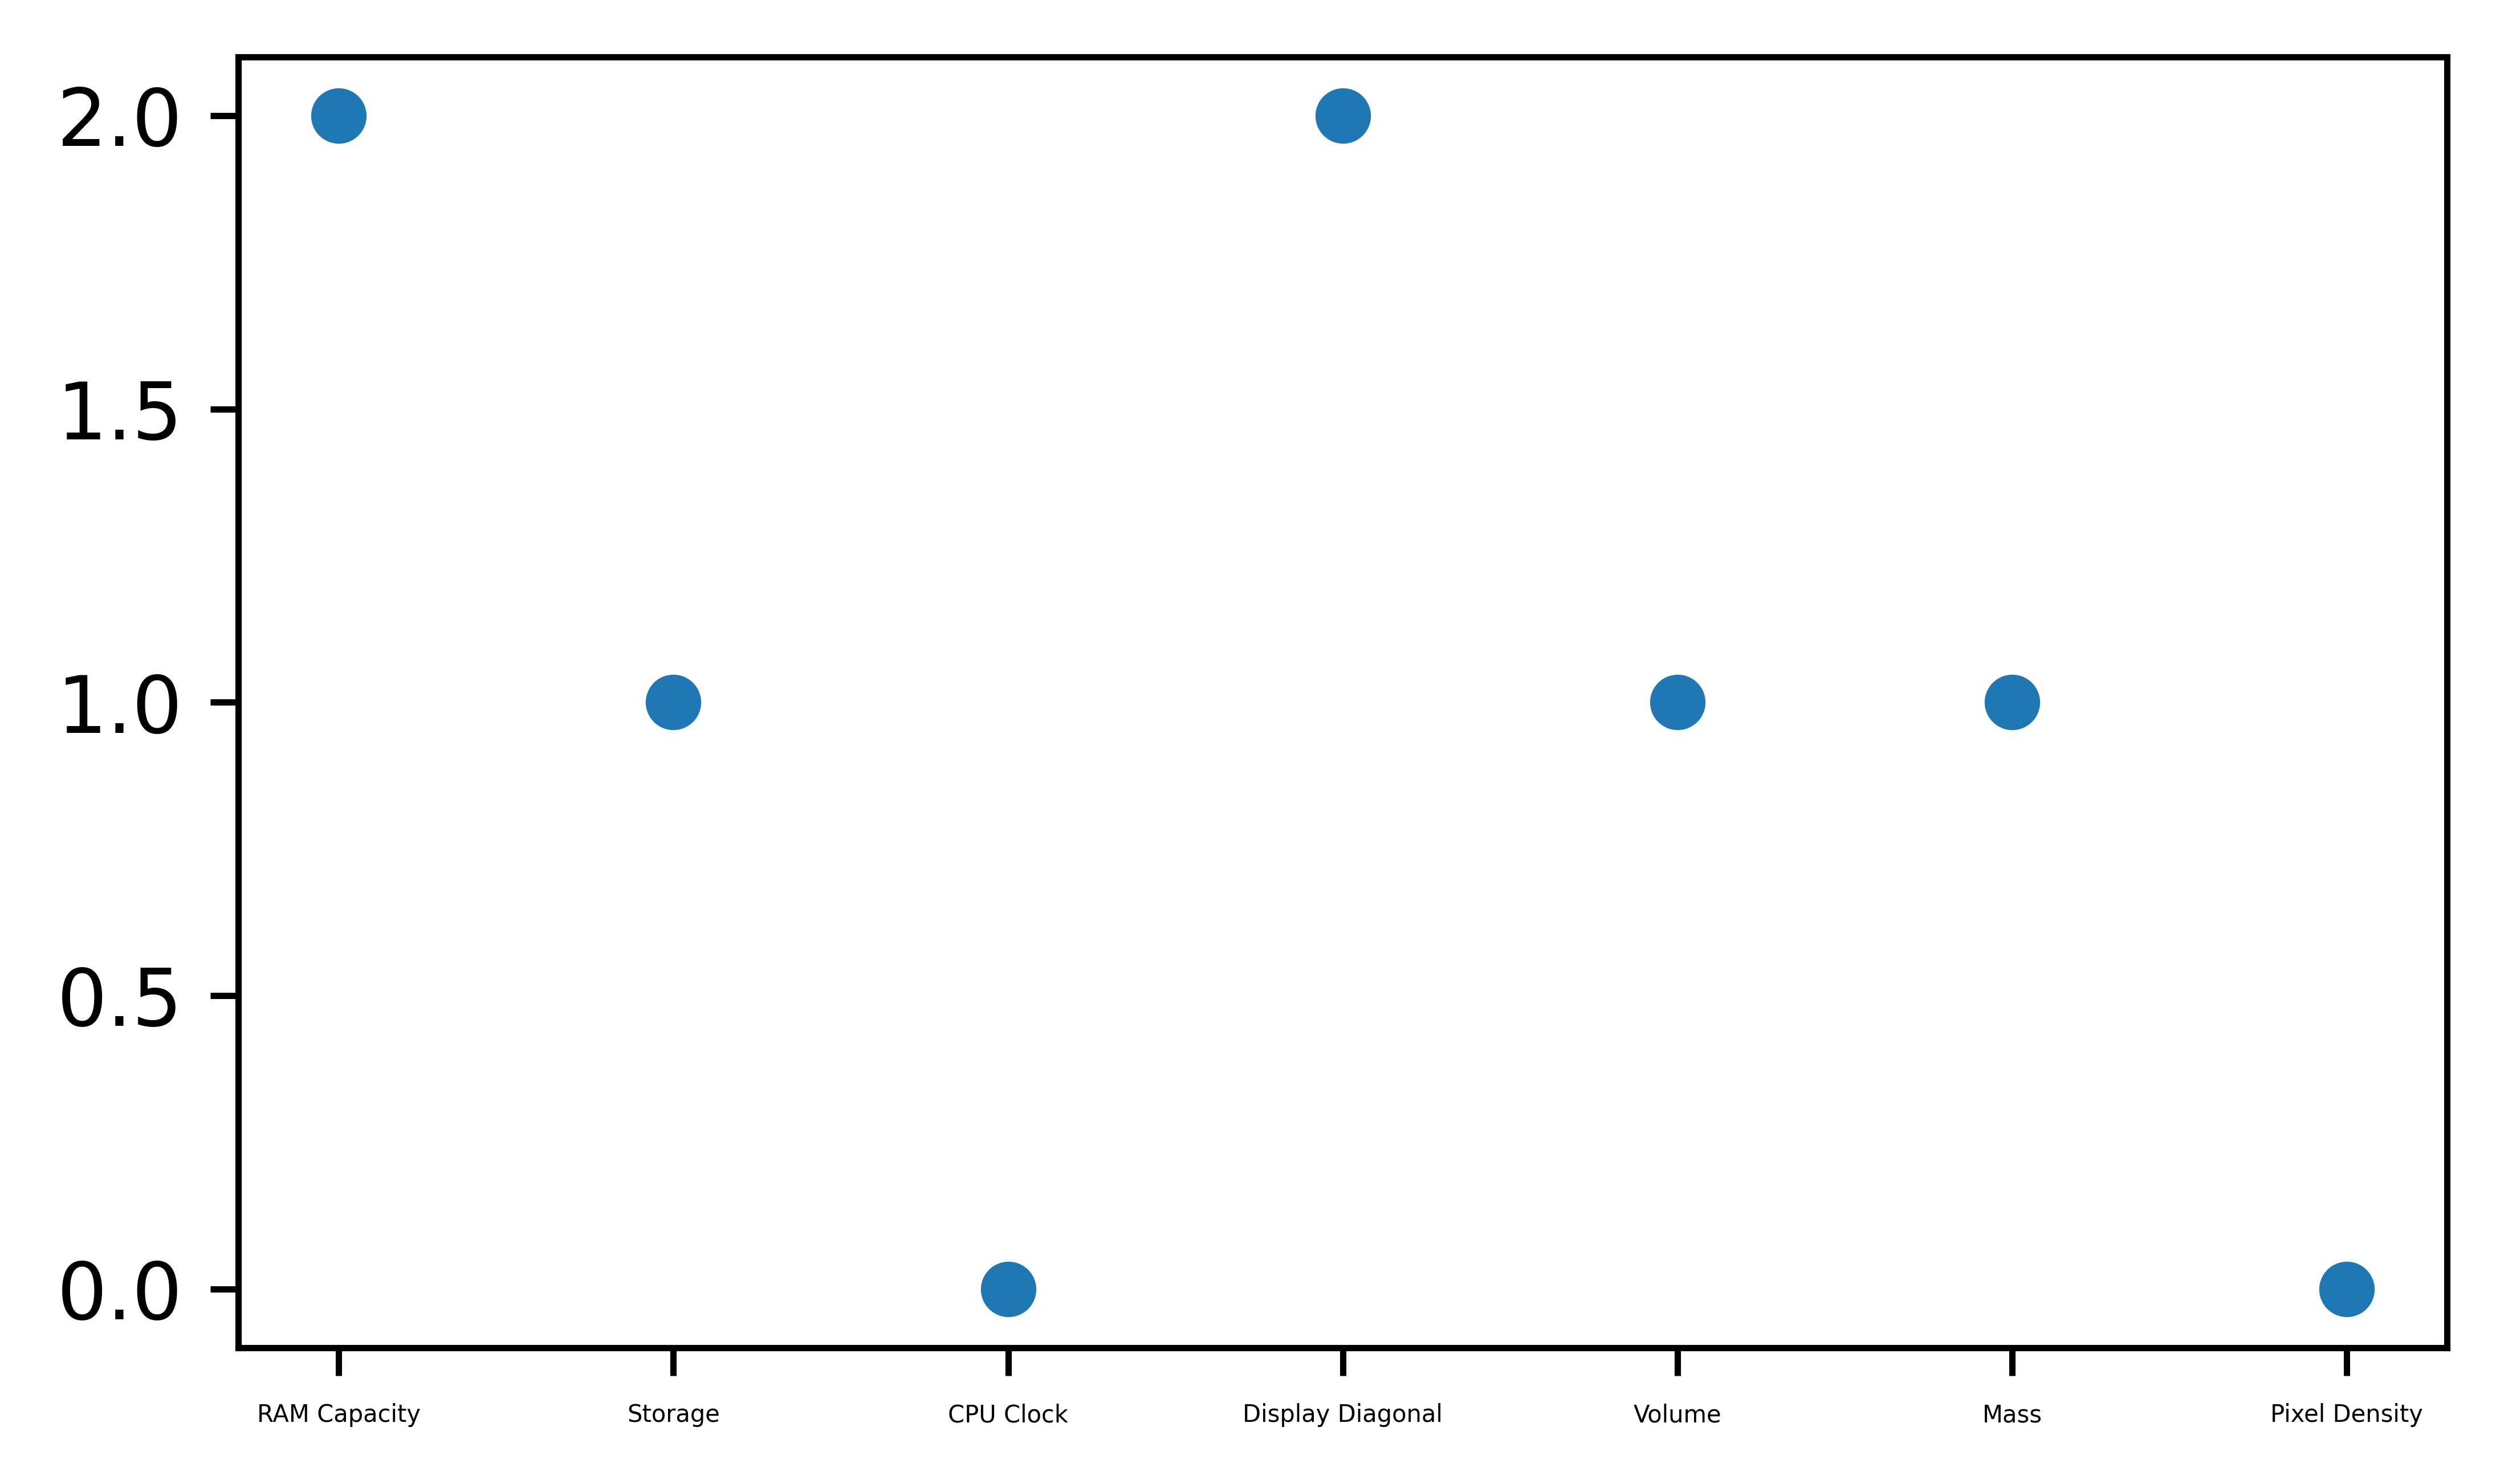

In [ ]:
kmeans = KMeans(3)
kmeans.fit(drop_redundant_input)   # 训练模型
labels = kmeans.predict(drop_redundant_input) 
plt.figure(figsize=(5,3))
plt.scatter(drop_redundant_features, labels)
plt.xticks(fontsize=3)
plt.show()

#Scatter plot for company vs count model number

In [ ]:
company_id=company_id[company_id.index%2==1]
company_id.index = range(len(company_id))
company_id

Old_ID        Company                         Company_real  New_ID
0       1.0          1und1                      United Internet   141.0
1       2.0           3Com                                 3Com     1.0
2       3.0         Abocom                       AboCom Systems     2.0
3       4.0           Acer                                 Acer     3.0
4       5.0          Ainol  Shenzhen Ainol Electronics Co., Ltd   116.0
..      ...            ...                                  ...     ...
208   209.0          Zenum                                Zenum   153.0
209   210.0           Ziss                        Ziss HongKong   154.0
210   211.0           Zopo                          Zopo Mobile   155.0
211   212.0            ZTE                                  ZTE   156.0
212   213.0  Sony Ericsson                        Sony Ericsson   124.0

[213 rows x 4 columns]

In [ ]:
model_company = model_company[model_company.index%2==1]
model_company.index = range(len(model_company))
model_company

Model Release Date  ...  Model ID  Company_ID
0            Casio Cassiopeia E-3000    1/01/2003  ...     260.0        26.0
1     Coxion WebBook Mobile Computer    1/01/2003  ...     261.0        35.0
2                 CyberBank POZ 0850    1/01/2003  ...     262.0        61.0
3          Medion MDPPC 100 (MD7200)    1/01/2003  ...     263.0        84.0
4            MiTAC Mio 728 PDA Phone    1/01/2003  ...     264.0        84.0
...                              ...          ...  ...       ...         ...
2898            Xiaomi Mi-Two / MI-2    1/12/2012  ...    3158.0       149.0
2899       Xiaomi Mi-Two / MI-2 32GB    1/12/2012  ...    3159.0       149.0
2900              ZTE N9120 Avid 4G     1/12/2012  ...    3160.0       156.0
2901                      ZTE U930HD    1/12/2012  ...    3161.0       156.0
2902                        ZTE V887    1/12/2012  ...    3162.0       156.0

[2903 rows x 5 columns]

In [ ]:
normed_product_data

Unnamed: 0  ...        Company_real
0              0  ...  Zebra Technologies
1              1  ...     Hewlett-Packard
2              2  ...  Zebra Technologies
3              3  ...     Hewlett-Packard
4              4  ...  Zebra Technologies
...          ...  ...                 ...
3157        3157  ...          Xiaomi Inc
3158        3158  ...          Xiaomi Inc
3159        3159  ...                 ZTE
3160        3160  ...                 ZTE
3161        3161  ...                 ZTE

[3162 rows x 19 columns]

In [ ]:
Company_ID_ls = set(normed_product_data['Company_ID'])
Company_ID_ls = list(Company_ID_ls)
Company_ID_ls.sort()
Company_ID_ls = np.array(Company_ID_ls)
Company_model_count = np.zeros(Company_ID_ls.shape)
for i in np.arange(len(Company_ID_ls)):
  for id in model_company['Company_ID']:
    if id == Company_ID_ls[i]:
      Company_model_count[i] += 1

In [ ]:
max(Company_model_count)

337.0

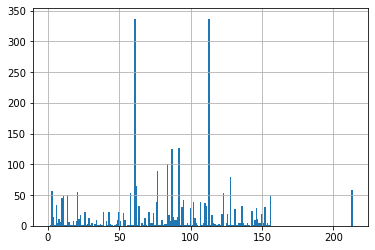

In [ ]:
plt.bar(Company_ID_ls, Company_model_count, width = 1)
plt.grid()
plt.show()

#Others

In [ ]:
normed_product_data

Model  ... Pixel Density (per inch)
0                     Psion Organiser II LZ 64  ...                 0.000000
1             Hewlett-Packard 95LX (HP Jaguar)  ...                 0.030793
2                               Psion Series 3  ...                 0.035336
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...                 0.030793
4                              Psion Series 3a  ...                 0.129985
...                                        ...  ...                      ...
3157                      Xiaomi Mi-Two / MI-2  ...                 0.751641
3158                 Xiaomi Mi-Two / MI-2 32GB  ...                 0.751641
3159                        ZTE N9120 Avid 4G   ...                 0.480061
3160                                ZTE U930HD  ...                 0.713781
3161                                  ZTE V887  ...                 0.358910

[3162 rows x 16 columns]

In [ ]:
#drop unwanted data
new_data = normed_product_data.drop(['Model', 'Release Date', 'Model ID'], axis=1)
new_data

Release Year  RAM Capacity (Mb)  ...  Mass (grams)  Pixel Density (per inch)
0      1989.000000           0.000000  ...      0.044181                  0.000000
1      1991.250000           0.000214  ...      0.053879                  0.030793
2      1991.416667           0.000092  ...      0.044181                  0.035336
3      1992.000000           0.000458  ...      0.053879                  0.030793
4      1993.166667           0.000214  ...      0.046336                  0.129985
...            ...                ...  ...           ...                       ...
3157   2012.916667           1.000000  ...      0.018319                  0.751641
3158   2012.916667           1.000000  ...      0.018319                  0.751641
3159   2012.916667           0.249977  ...      0.019397                  0.480061
3160   2012.916667           0.499985  ...      0.011422                  0.713781
3161   2012.916667           0.249977  ...      0.017241                  0.358910

[3162 rows x 13 columns]

In [ ]:
#normalize release year
delta = max(new_data["Release Year"]) - min(new_data["Release Year"])
min_data = min(new_data["Release Year"])
for i in range(len(new_data["Release Year"])):
  new_data.iloc[i, 0] = (new_data["Release Year"][i] - min_data) / delta

In [ ]:
new_data

Release Year  RAM Capacity (Mb)  ...  Mass (grams)  Pixel Density (per inch)
0         0.000000           0.000000  ...      0.044181                  0.000000
1         0.094077           0.000214  ...      0.053879                  0.030793
2         0.101045           0.000092  ...      0.044181                  0.035336
3         0.125436           0.000458  ...      0.053879                  0.030793
4         0.174216           0.000214  ...      0.046336                  0.129985
...            ...                ...  ...           ...                       ...
3157      1.000000           1.000000  ...      0.018319                  0.751641
3158      1.000000           1.000000  ...      0.018319                  0.751641
3159      1.000000           0.249977  ...      0.019397                  0.480061
3160      1.000000           0.499985  ...      0.011422                  0.713781
3161      1.000000           0.249977  ...      0.017241                  0.358910

[3162 rows x 13 columns]

In [ ]:
count=1
plt.subplots(figsize=(20, 20))
for i in new_data.columns[1:]: 
  plt.subplot(4,4,count)
  sns.scatterplot(new_data["Release Year"], new_data[i], color = 'red' )
  count+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

In [507]:
input_data

Unnamed: 0  ...        Company_real
0              0  ...  Zebra Technologies
1              1  ...     Hewlett-Packard
2              2  ...  Zebra Technologies
3              3  ...     Hewlett-Packard
4              4  ...  Zebra Technologies
...          ...  ...                 ...
3157        3157  ...          Xiaomi Inc
3158        3158  ...          Xiaomi Inc
3159        3159  ...                 ZTE
3160        3160  ...                 ZTE
3161        3161  ...                 ZTE

[3162 rows x 19 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

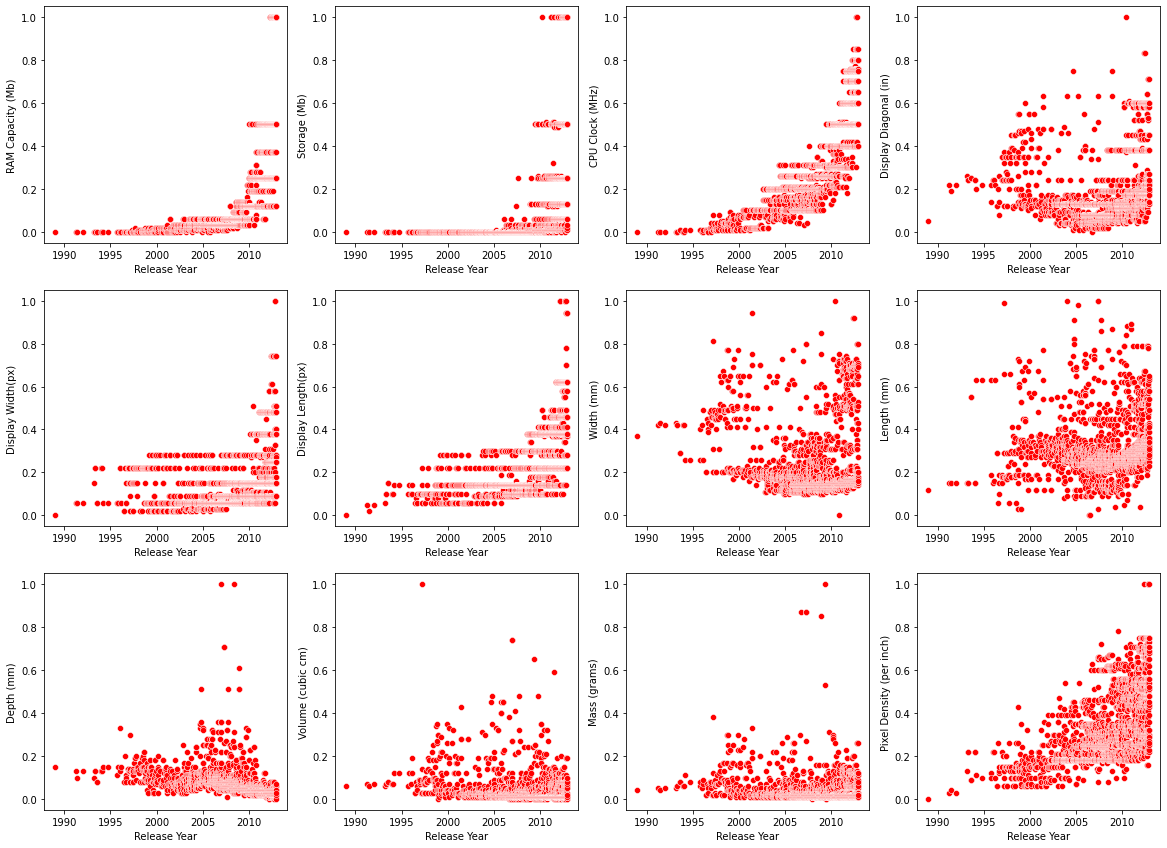

In [509]:
count=1
plt.subplots(figsize=(20, 20))
for i in input_data.columns[5:17]: 
  plt.subplot(4,4,count)
  sns.scatterplot(input_data["Release Year"], input_data[i], color = 'red' )
  count+=1
plt.show()

#Join data

In [ ]:
normed_product_data

Model  ... Pixel Density (per inch)
0                     Psion Organiser II LZ 64  ...                 0.000000
1             Hewlett-Packard 95LX (HP Jaguar)  ...                 0.030793
2                               Psion Series 3  ...                 0.035336
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...                 0.030793
4                              Psion Series 3a  ...                 0.129985
...                                        ...  ...                      ...
3157                      Xiaomi Mi-Two / MI-2  ...                 0.751641
3158                 Xiaomi Mi-Two / MI-2 32GB  ...                 0.751641
3159                        ZTE N9120 Avid 4G   ...                 0.480061
3160                                ZTE U930HD  ...                 0.713781
3161                                  ZTE V887  ...                 0.358910

[3162 rows x 16 columns]

In [ ]:
company_id=company_id[company_id.index%2==1]
company_id.index = range(len(company_id))
company_id

Old_ID        Company                         Company_real  New_ID
0       1.0          1und1                      United Internet   141.0
1       2.0           3Com                                 3Com     1.0
2       3.0         Abocom                       AboCom Systems     2.0
3       4.0           Acer                                 Acer     3.0
4       5.0          Ainol  Shenzhen Ainol Electronics Co., Ltd   116.0
..      ...            ...                                  ...     ...
208   209.0          Zenum                                Zenum   153.0
209   210.0           Ziss                        Ziss HongKong   154.0
210   211.0           Zopo                          Zopo Mobile   155.0
211   212.0            ZTE                                  ZTE   156.0
212   213.0  Sony Ericsson                        Sony Ericsson   124.0

[213 rows x 4 columns]

In [ ]:
model_company = model_company[model_company.index%2==1]
model_company.index = range(len(model_company))
model_company

Model Release Date  ...  Model ID  Company_ID
0            Casio Cassiopeia E-3000    1/01/2003  ...     260.0        26.0
1     Coxion WebBook Mobile Computer    1/01/2003  ...     261.0        35.0
2                 CyberBank POZ 0850    1/01/2003  ...     262.0        61.0
3          Medion MDPPC 100 (MD7200)    1/01/2003  ...     263.0        84.0
4            MiTAC Mio 728 PDA Phone    1/01/2003  ...     264.0        84.0
...                              ...          ...  ...       ...         ...
2898            Xiaomi Mi-Two / MI-2    1/12/2012  ...    3158.0       149.0
2899       Xiaomi Mi-Two / MI-2 32GB    1/12/2012  ...    3159.0       149.0
2900              ZTE N9120 Avid 4G     1/12/2012  ...    3160.0       156.0
2901                      ZTE U930HD    1/12/2012  ...    3161.0       156.0
2902                        ZTE V887    1/12/2012  ...    3162.0       156.0

[2903 rows x 5 columns]

In [ ]:
for i in range(normed_product_data.shape[0]):
  for j in range(len(model_company['Model ID'])):
    if normed_product_data['Model ID'][i] == model_company['Model ID'][j]:
      new_column[i] = model_company['Company_ID'][j]
  print(i)
new_column

In [ ]:
normed_product_data.loc[:, 'Company_ID'] = new_column

In [ ]:
normed_product_data

Model  ... Company_ID
0                     Psion Organiser II LZ 64  ...        0.0
1             Hewlett-Packard 95LX (HP Jaguar)  ...        0.0
2                               Psion Series 3  ...        0.0
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...        0.0
4                              Psion Series 3a  ...        0.0
...                                        ...  ...        ...
3157                      Xiaomi Mi-Two / MI-2  ...      149.0
3158                 Xiaomi Mi-Two / MI-2 32GB  ...      149.0
3159                        ZTE N9120 Avid 4G   ...      156.0
3160                                ZTE U930HD  ...      156.0
3161                                  ZTE V887  ...      156.0

[3162 rows x 17 columns]

In [ ]:
missed_id = np.zeros(258)
missed_id = list(missed_id)
for i in range(258):
  missed_id[i] = normed_product_data['Model'][i].split()[0]
missed_id

['Psion',
 'Hewlett-Packard',
 'Psion',
 'Hewlett-Packard',
 'Psion',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple',
 'Apple',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple',
 'Apple',
 'Hewlett-Packard',
 'Apple',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple',
 'U.S.',
 'U.S.',
 'Nokia',
 'Hewlett-Packard',
 'Psion',
 'Psion',
 'Ericsson',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'NEC',
 'Sharp',
 'Casio',
 'Apple',
 'Apple',
 'U.S.',
 'U.S.',
 'Casio',
 'Sharp',
 'Compaq',
 'Hewlett-Packard',
 'Psion',
 'Psion',
 'IBM',
 'IBM',
 'NEC',
 'Philips',
 'Casio',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Geofox',
 'NEC',
 'Nokia',
 'Apple',
 'Compaq',
 'LG',
 'NEC',
 'Sharp',
 'LG',
 '3Com',
 'Symbol',
 'Hitachi',
 'Hitachi',
 'Ericsson',
 'IBM',
 'NEC',
 'NEC',
 'Sharp',
 'Casio',
 'Nokia',
 'Philips',
 'Philips',
 'Casio',
 'Compaq',
 'Compaq',
 'Compaq',
 'Nokia',
 'Philips',
 'Sharp',
 'Geofox',
 'LG',
 'Psion',
 'Sharp',
 'Casio',
 'Casio',
 'Samsung',
 'Sh

In [ ]:
missed_id_insert = np.zeros(len(missed_id))
for i in range(len(company_id['Company'])):
  for j in range(len(missed_id)):
    if missed_id[j] == company_id['Company'][i]:
      missed_id_insert[j] = company_id['New_ID'][i]
    elif missed_id[j] == company_id['Company_real'][i]:
      missed_id_insert[j] = company_id['New_ID'][i]

missed_id_insert = list(missed_id_insert)
missed_id_insert

[152.0,
 58.0,
 152.0,
 58.0,
 152.0,
 58.0,
 58.0,
 10.0,
 10.0,
 58.0,
 58.0,
 10.0,
 10.0,
 58.0,
 10.0,
 58.0,
 58.0,
 10.0,
 102.0,
 102.0,
 92.0,
 58.0,
 152.0,
 152.0,
 46.0,
 58.0,
 58.0,
 58.0,
 91.0,
 115.0,
 26.0,
 10.0,
 10.0,
 102.0,
 102.0,
 26.0,
 115.0,
 32.0,
 58.0,
 152.0,
 152.0,
 65.0,
 65.0,
 91.0,
 105.0,
 26.0,
 58.0,
 58.0,
 52.0,
 91.0,
 92.0,
 10.0,
 32.0,
 77.0,
 91.0,
 115.0,
 77.0,
 1.0,
 152.0,
 59.0,
 59.0,
 46.0,
 65.0,
 91.0,
 91.0,
 115.0,
 26.0,
 92.0,
 105.0,
 105.0,
 26.0,
 32.0,
 32.0,
 32.0,
 92.0,
 105.0,
 115.0,
 52.0,
 77.0,
 152.0,
 115.0,
 26.0,
 26.0,
 113.0,
 115.0,
 142.0,
 32.0,
 105.0,
 32.0,
 58.0,
 58.0,
 92.0,
 1.0,
 1.0,
 91.0,
 105.0,
 58.0,
 115.0,
 32.0,
 58.0,
 58.0,
 59.0,
 59.0,
 1.0,
 26.0,
 26.0,
 26.0,
 65.0,
 59.0,
 94.0,
 70.0,
 70.0,
 1.0,
 32.0,
 152.0,
 65.0,
 32.0,
 56.0,
 56.0,
 65.0,
 1.0,
 55.0,
 101.0,
 101.0,
 101.0,
 58.0,
 58.0,
 58.0,
 152.0,
 115.0,
 32.0,
 91.0,
 105.0,
 142.0,
 26.0,
 102.0,
 102.0,
 46.0,
 

In [ ]:
for i in range(258):
  normed_product_data.loc[:, 'Company_ID'][i] = missed_id_insert[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
normed_product_data

Model  ... Company_real
0                     Psion Organiser II LZ 64  ...            0
1             Hewlett-Packard 95LX (HP Jaguar)  ...            0
2                               Psion Series 3  ...            0
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...            0
4                              Psion Series 3a  ...            0
...                                        ...  ...          ...
3157                      Xiaomi Mi-Two / MI-2  ...   Xiaomi Inc
3158                 Xiaomi Mi-Two / MI-2 32GB  ...   Xiaomi Inc
3159                        ZTE N9120 Avid 4G   ...          ZTE
3160                                ZTE U930HD  ...          ZTE
3161                                  ZTE V887  ...          ZTE

[3162 rows x 18 columns]

In [ ]:
new_column = np.zeros(normed_product_data.shape[0])
new_column = list(new_column)
for i in range(normed_product_data.shape[0]):
  for j in range(len(company_id['New_ID'])):
    if normed_product_data['Company_ID'][i] == company_id['New_ID'][j]:
      new_column[i] = company_id['Company_real'][j]
    elif normed_product_data['Company_ID'][i] == 213:
      new_column[i] = 'Sony Ericsson'
  print(i)
new_column

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

['Zebra Technologies',
 'Hewlett-Packard',
 'Zebra Technologies',
 'Hewlett-Packard',
 'Zebra Technologies',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple Inc',
 'Apple Inc',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple Inc',
 'Apple Inc',
 'Hewlett-Packard',
 'Apple Inc',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Apple Inc',
 'Palm',
 'Palm',
 'Nokia Corporation',
 'Hewlett-Packard',
 'Zebra Technologies',
 'Zebra Technologies',
 'Ericsson',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'NEC Corporationæ',
 'Sharp Corporation',
 'Casio',
 'Apple Inc',
 'Apple Inc',
 'Palm',
 'Palm',
 'Casio',
 'Sharp Corporation',
 'Compaq',
 'Hewlett-Packard',
 'Zebra Technologies',
 'Zebra Technologies',
 'IBM',
 'IBM',
 'NEC Corporationæ',
 'Philips',
 'Casio',
 'Hewlett-Packard',
 'Hewlett-Packard',
 'Geofox Mobile',
 'NEC Corporationæ',
 'Nokia Corporation',
 'Apple Inc',
 'Compaq',
 'LG Electronics',
 'NEC Corporationæ',
 'Sharp Corporation',
 'LG Electronics',
 '3Com',
 'Zeb

In [ ]:
normed_product_data.loc[:, 'Company_real'] = new_column

In [ ]:
normed_product_data

Model  ...        Company_real
0                     Psion Organiser II LZ 64  ...  Zebra Technologies
1             Hewlett-Packard 95LX (HP Jaguar)  ...     Hewlett-Packard
2                               Psion Series 3  ...  Zebra Technologies
3     Hewlett-Packard 95LX 1MB RAM (HP Jaguar)  ...     Hewlett-Packard
4                              Psion Series 3a  ...  Zebra Technologies
...                                        ...  ...                 ...
3157                      Xiaomi Mi-Two / MI-2  ...          Xiaomi Inc
3158                 Xiaomi Mi-Two / MI-2 32GB  ...          Xiaomi Inc
3159                        ZTE N9120 Avid 4G   ...                 ZTE
3160                                ZTE U930HD  ...                 ZTE
3161                                  ZTE V887  ...                 ZTE

[3162 rows x 18 columns]

In [ ]:
normed_product_data.to_csv("./output.csv")

#Innovation Diffusion Exploration

##Data Presentation

In [162]:
normed_product_data

Unnamed: 0  ...        Company_real
0              0  ...  Zebra Technologies
1              1  ...     Hewlett-Packard
2              2  ...  Zebra Technologies
3              3  ...     Hewlett-Packard
4              4  ...  Zebra Technologies
...          ...  ...                 ...
3157        3157  ...          Xiaomi Inc
3158        3158  ...          Xiaomi Inc
3159        3159  ...                 ZTE
3160        3160  ...                 ZTE
3161        3161  ...                 ZTE

[3162 rows x 19 columns]

##Implement the need functions

In [384]:
def overall_pre(data, feature_name_to_norm, digit):
  '''
  :param data: Original DataFrame
  :param feature_name_to_norm: A string of name of feature need to be normalized, in this case should be Release Year, input None and reload the original data if don't want to norm it
  :param digit: A integer to rounding the Original DataFrame

  Return the pre-processed data
  '''
  data = data.round(2)

  if feature_name_to_norm != None:
    column_names = [column for column in data]
    idx = column_names.index(feature_name_to_norm)
    delta = max(data[feature_name_to_norm]) - min(data[feature_name_to_norm])
    min_data = min(data[feature_name_to_norm])
    for i in range(len(data[feature_name_to_norm])):
      data.iloc[i, idx] = (data[feature_name_to_norm][i] - min_data) / delta
  return data


def get_target_dataframe(data, feature_name_1, feature_name_2):
  '''
  :param data: Original DataFrame
  :param feature_name_1: A string of name of first reserved feature
  :param feature_name_2: A string of name of second reserved feature

  Return the DataFrame with only the designated feature name and its Company_ID, Company_real, 	Model ID
  '''
  column_names = [column for column in data]
  del column_names[column_names.index(feature_name_1)]
  del column_names[column_names.index(feature_name_2)]
  del column_names[column_names.index('Model ID')]
  del column_names[column_names.index('Company_ID')]
  del column_names[column_names.index('Company_real')]

  new_data_frame = data.drop(column_names, axis = 1)
  return new_data_frame


def filter(data, feature_name, top_n):
  '''
  :param data: DataFrame, could be Original DataFrame or DataFrame output from get_target_dataframe
  :param feature_name: a string of target feature name
  :param top_n: reserve top n feature

  Return a list of top_n most frequent feature property in the column of feature_name
  '''
  data_rounded_list = list(round(data[feature_name], 2))
  set_of_data = set(data_rounded_list)
  list_of_set = list(set_of_data)
  feature_dic = {}
  for i in range(len(list_of_set)):
    counting = data_rounded_list.count(list_of_set[i])
    feature_dic[str(list_of_set[i])] = counting
  
  feature_dic = sorted(feature_dic.items(), key=lambda x: x[1], reverse=True)
  feature_ls = feature_dic[:top_n]
  feature = []
  for i in range(len(feature_ls)):
    feature.append(float(feature_ls[i][0]))
  return feature


def get_first_n_data(data, spci_feature, feature_name):
  '''
  :param data: DataFrame, could be Original DataFrame or DataFrame output from get_target_dataframe
  :param spci_feature: Output of function: filter
  :param feature_name: Target feature_name

  Return A DataFrame with only spci_feature in it.
  '''
  total_idx = [i for i in range(len(data))]
  reserved_idx = []

  for i in spci_feature:
    idx_list_feature = np.where(data[feature_name] == i)
    idx_list_feature = np.array(idx_list_feature)
    idx_list_feature = idx_list_feature.tolist()
    reserved_idx += idx_list_feature[0]

  reserved_idx.sort()
  dropped_idx = [x for x in total_idx if x not in reserved_idx]
  new_dropped_data = data.drop(index=dropped_idx)
  return new_dropped_data

def fetch_first_adaptor(data, feature_name, spci_feature, first_n_adapotor):
  '''
  :param data: DataFrame, could be Original DataFrame or DataFrame output from get_target_dataframe
  :param feature_name: Target feature_name
  :param spci_feature: Output of function: filter
  :param first_n_adapotor：A integer to define first n adapter will be reserved

  Return a New DataFrame with only first_n_adaptor in it.
  '''
  result = DataFrame()
  for i in spci_feature:
    temp_data = get_first_n_data(data, [i], feature_name)
    temp_row = temp_data.head(first_n_adapotor)
    result = result.append(temp_row)
  return result

##A sample presentation of functions above

In [435]:
#Over-all pre-process, all attributes are rounded to 2 decimal place, this will create a soft boundary for each attributes and reduce the noise caused by slightly different number.
input_data = overall_pre(normed_product_data, None, 2)
input_data

Unnamed: 0  ...        Company_real
0              0  ...  Zebra Technologies
1              1  ...     Hewlett-Packard
2              2  ...  Zebra Technologies
3              3  ...     Hewlett-Packard
4              4  ...  Zebra Technologies
...          ...  ...                 ...
3157        3157  ...          Xiaomi Inc
3158        3158  ...          Xiaomi Inc
3159        3159  ...                 ZTE
3160        3160  ...                 ZTE
3161        3161  ...                 ZTE

[3162 rows x 19 columns]

In [436]:
#Drop the unwanted attributes and only reserve the target attributes, in this case the attributs CPU Clock (MHz) is reserved
dropped_data = get_target_dataframe(input_data, 'Release Year', 'CPU Clock (MHz)')
dropped_data

Release Year  Model ID  CPU Clock (MHz)  Company_ID        Company_real
0          1989.00         1             0.00         152  Zebra Technologies
1          1991.25         2             0.00          58     Hewlett-Packard
2          1991.42         3             0.00         152  Zebra Technologies
3          1992.00         4             0.00          58     Hewlett-Packard
4          1993.17         5             0.00         152  Zebra Technologies
...            ...       ...              ...         ...                 ...
3157       2012.92      3158             0.75         149          Xiaomi Inc
3158       2012.92      3159             0.75         149          Xiaomi Inc
3159       2012.92      3160             0.60         156                 ZTE
3160       2012.92      3161             0.60         156                 ZTE
3161       2012.92      3162             0.50         156                 ZTE

[3162 rows x 5 columns]

In [437]:
#Get the top 10 frequent CPU Clock properties. Given the result we can see 0.5, 0.2, 0.26, 0.1, 0.3, 0.4, 0.31, 0.6, 0.75, 0.21 MHz CPU is the most popular CPU Clock Hz.
spci_feature = filter(dropped_data, 'CPU Clock (MHz)', 10)
spci_feature

[0.5, 0.2, 0.26, 0.1, 0.3, 0.4, 0.31, 0.6, 0.75, 0.21]

In [442]:
#Get the DataFrame with only 0.5, 0.2, 0.26, 0.1, 0.3, 0.4, 0.31, 0.6, 0.75, 0.21 MHz CPU Clock in it.
new_dataframe = get_first_n_data(dropped_data, spci_feature, 'CPU Clock (MHz)')
new_dataframe

Release Year  Model ID  CPU Clock (MHz)  Company_ID     Company_real
145        2000.50       146             0.10          32           Compaq
149        2000.58       150             0.10          32           Compaq
153        2000.67       154             0.10          58  Hewlett-Packard
157        2000.75       158             0.10          58  Hewlett-Packard
167        2001.17       168             0.10          32           Compaq
...            ...       ...              ...         ...              ...
3157       2012.92      3158             0.75         149       Xiaomi Inc
3158       2012.92      3159             0.75         149       Xiaomi Inc
3159       2012.92      3160             0.60         156              ZTE
3160       2012.92      3161             0.60         156              ZTE
3161       2012.92      3162             0.50         156              ZTE

[2219 rows x 5 columns]

In [443]:
#Fetch the first 1 adaptor in each CPU Clock in 0.5, 0.2, 0.26, 0.1, 0.3, 0.4, 0.31, 0.6, 0.75, 0.21 MHz
top_1_new_adaptor_in_most_frequent_CPU_Clock = fetch_first_adaptor(dropped_data, 'CPU Clock (MHz)', spci_feature, 1)
top_1_new_adaptor_in_most_frequent_CPU_Clock

Release Year  Model ID  CPU Clock (MHz)  Company_ID          Company_real
1650       2009.50      1651             0.50          94       NTT DOCOMO, Inc
233        2002.58       234             0.20          14                  Asus
407        2004.42       408             0.26          14                  Asus
145        2000.50       146             0.10          32                Compaq
1150       2007.83      1151             0.30          30  Clearview Technology
1082       2007.58      1083             0.40          77        LG Electronics
395        2004.33       396             0.31          39                  Dell
2094       2010.83      2095             0.60          87              Motorola
2208       2011.25      2209             0.75          61                   HTC
434        2004.67       435             0.21          50           Fujitsu Ltd

In [441]:
#Fetch the first 2 adaptor in each CPU Clock in 0.5, 0.2, 0.26, 0.1, 0.3, 0.4, 0.31, 0.6, 0.75, 0.21 MHz
#To run this cell, rerun the cell of [new_dataframe = get_first_n_data(dropped_data, spci_feature, 'CPU Clock (MHz)')] first.
top_2_new_adaptor_in_most_frequent_CPU_Clock = fetch_first_adaptor(dropped_data, 'CPU Clock (MHz)', spci_feature, 2)
top_2_new_adaptor_in_most_frequent_CPU_Clock

Release Year  Model ID  CPU Clock (MHz)  Company_ID          Company_real
1650       2009.50      1651             0.50          94       NTT DOCOMO, Inc
1662       2009.50      1663             0.50         136   Toshiba Corporation
233        2002.58       234             0.20          14                  Asus
234        2002.58       235             0.20          50           Fujitsu Ltd
407        2004.42       408             0.26          14                  Asus
428        2004.58       429             0.26          50           Fujitsu Ltd
145        2000.50       146             0.10          32                Compaq
149        2000.58       150             0.10          32                Compaq
1150       2007.83      1151             0.30          30  Clearview Technology
1151       2007.83      1152             0.30          34    Cowon Systems, Inc
1082       2007.58      1083             0.40          77        LG Electronics
1489       2008.83      1490             0.40         113               Samsung
395        2004.33       396             0.31          39                  Dell
397        2004.33       398             0.31          39                  Dell
2094       2010.83      2095             0.60          87              Motorola
2180       2011.08      2181             0.60         126    Sprint Corporation
2208       2011.25      2209             0.75          61                   HTC
2237       2011.33      2238             0.75          61                   HTC
434        2004.67       435             0.21          50           Fujitsu Ltd
448        2004.75       449             0.21          39                  Dell

In [510]:
input_data.columns[0:]

Index(['Unnamed: 0', 'Model', 'Release Date', 'Release Year', 'Model ID',
       'RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)',
       'Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)',
       'Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)',
       'Mass (grams)', 'Pixel Density (per inch)', 'Company_ID',
       'Company_real'],
      dtype='object')

##A sample plot for result use these function

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

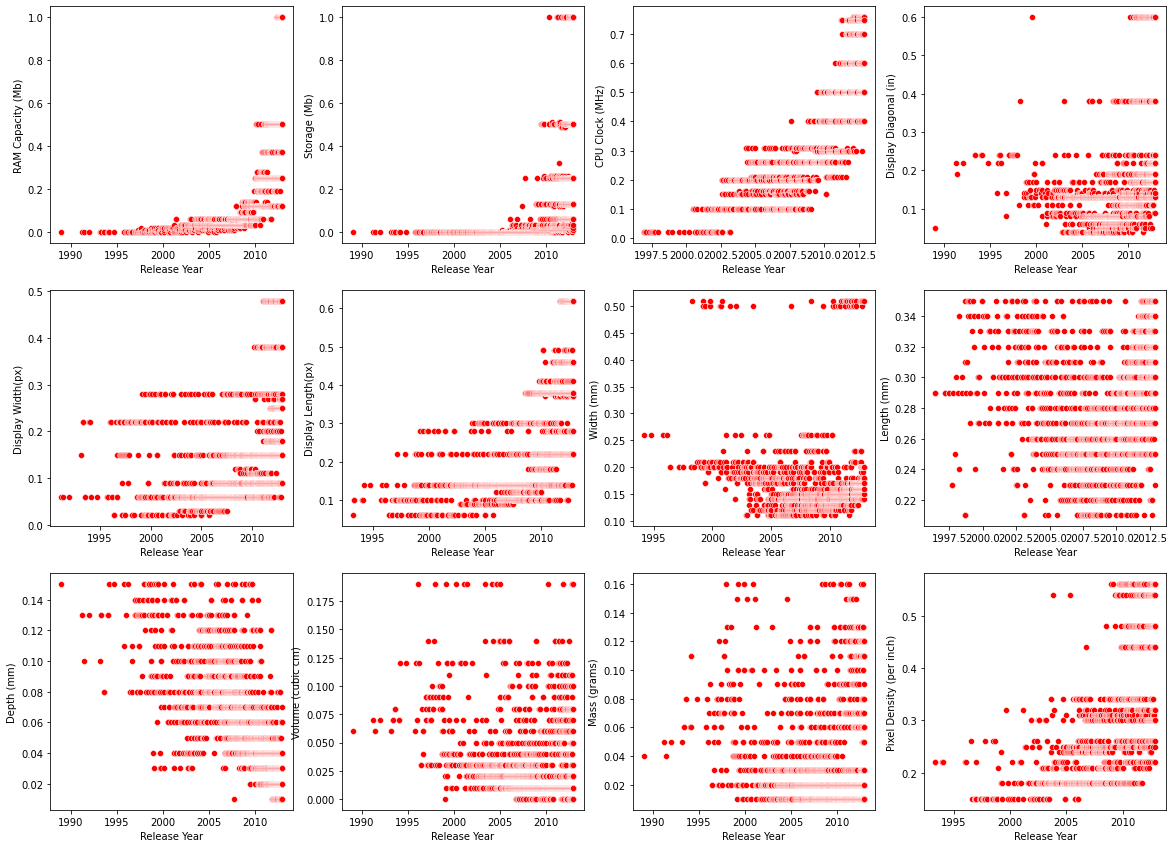

In [432]:
#Plot the processed data, with only the first 15 most frequent property in each feature

input_data = overall_pre(normed_product_data, None, 2)

count=1
plt.subplots(figsize=(20, 20))
for i in input_data.columns[5:17]: 
  plt.subplot(4,4,count)
  dropped_data = get_target_dataframe(input_data, 'Release Year', i)
  spci_feature = filter(dropped_data, str(i), 15)
  new_dataframe = get_first_n_data(dropped_data, spci_feature, i)
  sns.scatterplot(new_dataframe["Release Year"], new_dataframe[i], color = 'red' )
  count+=1
plt.show()

#Get DataFrame of first adapter in each features

##Create Raw DataFrame

In [452]:
most_innovated_mobile_phones = DataFrame() #Create a empty DataFrame Object to store the following data
input_data = overall_pre(normed_product_data, None, 2) #Over-all pre-process, all attributes are rounded to 2 decimal place, this will create a soft boundary for each attributes and reduce the noise caused by slightly different number.
features = ['RAM Capacity (Mb)','Storage (Mb)','CPU Clock (MHz)','Display Width(px)','Display Length(px)','Pixel Density (per inch)'] #Specify the features influenced by innovation diffusion theory.
for i in features:  #Loop through each specified features
  spci_feature = filter(input_data, i, 15)  #Get the top 15 frequent properties in current feature.
  top_1_new_adaptor = fetch_first_adaptor(input_data, i, spci_feature, 1) #Fetch the first adaptors in each feature.
  most_innovated_mobile_phones = most_innovated_mobile_phones.append(top_1_new_adaptor) #Append it into DataFrame.

most_innovated_mobile_phones #Show results

Unnamed: 0  ...          Company_real
167          167  ...                Compaq
175          175  ...        AboCom Systems
1798        1798  ...                Google
1829        1829  ...               Philips
1194        1194  ...    Zebra Technologies
...          ...  ...                   ...
116          116  ...                Compaq
346          346  ...              Motorola
1538        1538  ...  Inventec Corporation
848          848  ...    Cowon Systems, Inc
23            23  ...    Zebra Technologies

[90 rows x 19 columns]

##Create DataFrame of times of being First Adaptor for each company

In [474]:
#Sort the index for further use
sorted_most_innovated_mobile_phones = most_innovated_mobile_phones
sorted_most_innovated_mobile_phones.index = range(len(sorted_most_innovated_mobile_phones))
sorted_most_innovated_mobile_phones

Unnamed: 0  ...          Company_real
0          167  ...                Compaq
1          175  ...        AboCom Systems
2         1798  ...                Google
3         1829  ...               Philips
4         1194  ...    Zebra Technologies
..         ...  ...                   ...
85         116  ...                Compaq
86         346  ...              Motorola
87        1538  ...  Inventec Corporation
88         848  ...    Cowon Systems, Inc
89          23  ...    Zebra Technologies

[90 rows x 19 columns]

In [484]:
#Get the times of being first adaptor for each company
Companies = list(set(most_innovated_mobile_phones['Company_real']))
count_list = []
for i in Companies:
  count = 0
  for j in most_innovated_mobile_phones['Company_real']:
    if j == i:
      count += 1
  count_list.append(count)

In [485]:
#Get a correspond list of Company ID and Compan Name
def get_company_ID(data, company_name):
  for i in range(len(data)):
    if data['Company_real'][i] == company_name:
      return data['Company_ID'][i]

Companies_ID = []
for i in Companies:
  id = get_company_ID(sorted_most_innovated_mobile_phones, str(i))
  Companies_ID.append(id)

In [496]:
#Create the DataFrame
final_DataFrame = {'Companies': Companies, 'Companies_ID':Companies_ID, 'times of being first adpator':count_list}
final_DataFrame = DataFrame(final_DataFrame)
final_DataFrame

Companies  Companies_ID  times of being first adpator
0           Clearview Technology            30                             1
1                       T-Mobile           128                             1
2                  Sony Ericsson           213                             1
3   HannStar Display Corporation            57                             1
4                         Google            54                             1
5       MiTAC International Corp            84                             3
6              Nokia Corporation            92                             3
7                        Samsung           113                             4
8                           Palm           102                             1
9             BlackBerry Limited            21                             1
10                LG Electronics            77                             5
11                     ViewSonic           145                             1
12           Toshiba Corporation           136                             1
13                        Compaq            32                             4
14                           HTC            61                             6
15          Inventec Corporation            71                             2
16                       Philips           105                             1
17            Sprint Corporation           126                             1
18               Hewlett-Packard            58                             6
19                     Blaupunkt            22                             1
20           Kyocera Corporation            74                             1
21              Sony Corporation           123                             4
22                      Motorola            87                             4
23                          Asus            14                             3
24            Zebra Technologies           152                             6
25                     Orange UK           100                             2
26           Gigabyte Technology            53                             1
27                     enTourage            45                             1
28                AboCom Systems             2                             1
29             Sharp Corporation           115                             4
30          TechFaith Wireless??           131                             1
31               NTT DOCOMO, Inc            94                             1
32            Cowon Systems, Inc            34                             2
33                          Dell            39                             1
34                      Ericsson            46                             1
35                   Fujitsu Ltd            50                             1
36               EKEN Electronic            44                             1
37                     Apple Inc            10                            10

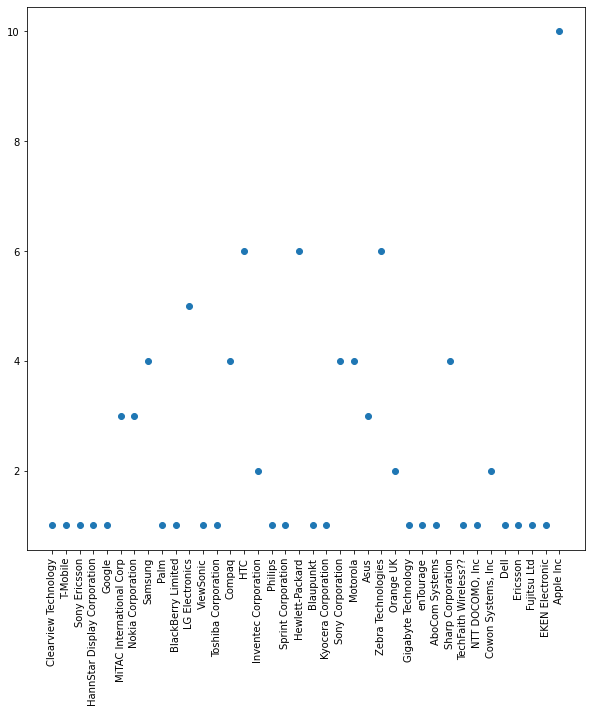

In [504]:
plt.figure(figsize=(10, 10))
plt.scatter(final_DataFrame['Companies'], final_DataFrame['times of being first adpator'])
plt.xticks(rotation=90)
plt.show()